# CASE STUDY: FASHION CLASS CLASSIFICATION

In [1]:
## PROBLEM STATEMENT



## IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as random

In [2]:
df_train= pd.read_csv("fashion-mnist_train.csv")
df_test = pd.read_csv("fashion-mnist_test.csv")


## VISUALIZING DATA

In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(60000, 785)

In [5]:
training= np.array(df_train,dtype="float32")
testing = np.array(df_test,dtype="float32")

9.0

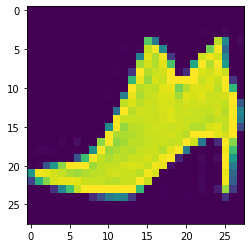

In [25]:

i= random.randint(1,6000)

plt.imshow(training[i,1:].reshape(28,28))
label= training[i,0]
label

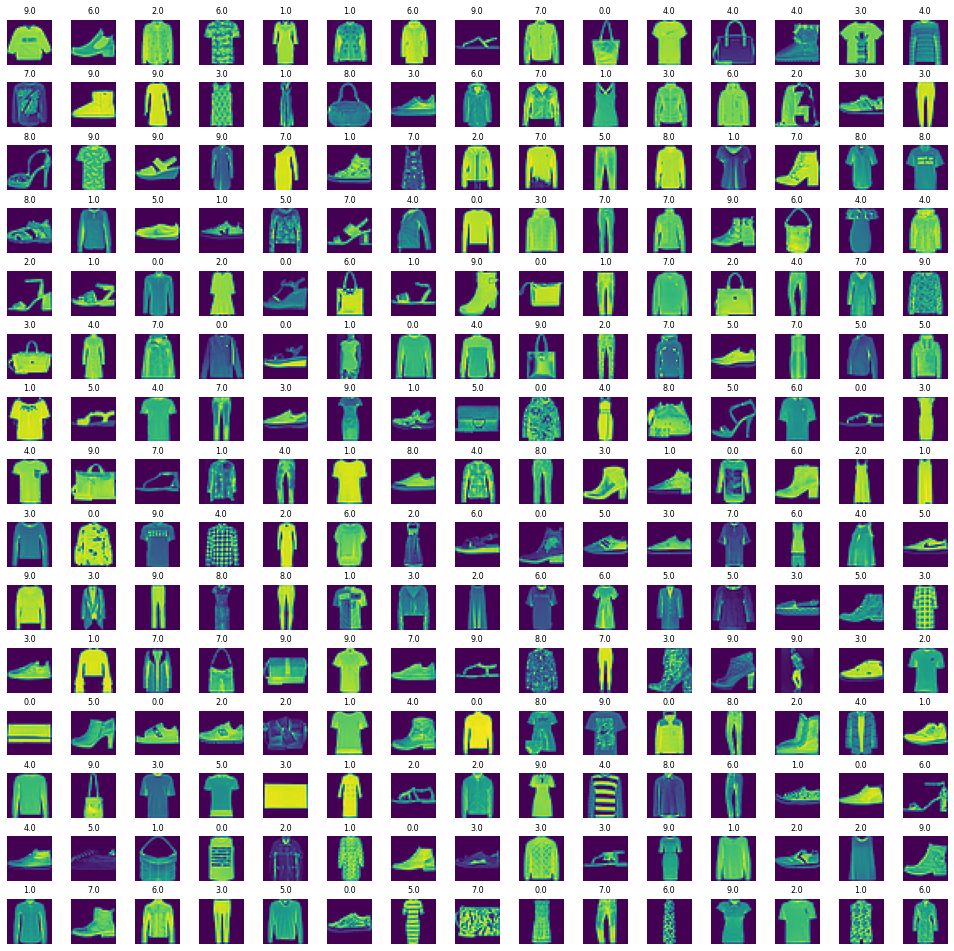

In [28]:
W_grid=15
l_grid=15

fig,axes =plt.subplots(W_grid,l_grid,figsize=(17,17))
axes=axes.ravel()
n_training= len(training)

for i in np.arange(0,W_grid*l_grid):
    index=random.randint(1,n_training)
    
    axes[i].imshow(training[i,1:].reshape(28,28))
    axes[i].set_title(training[index,0],fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## MAKING A MODEL

In [6]:
x_train= training[:,1:]/255
y_train= training[:,0]

x_test=testing[:,1:]/255
y_test=testing[:,0]


In [7]:
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid= train_test_split(x_train,y_train,test_size=(0.2),random_state=42)

In [8]:
x_train=x_train.reshape(x_train.shape[0],*(28,28,1))
x_test=x_test.reshape(x_test.shape[0],*(28,28,1))
x_valid=x_valid.reshape(x_valid.shape[0],*(28,28,1))

In [9]:
x_train.shape

(48000, 28, 28, 1)

In [10]:
x_valid.shape

(12000, 28, 28, 1)

In [13]:
import keras

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [18]:
cnn_model =Sequential()

In [19]:
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))

In [20]:
cnn_model.add(MaxPool2D(pool_size=(2,2)))